<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!


## Access Popular LLMs via Google-Colab-AI Without an API Key
Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

```
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)
```


## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).


Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  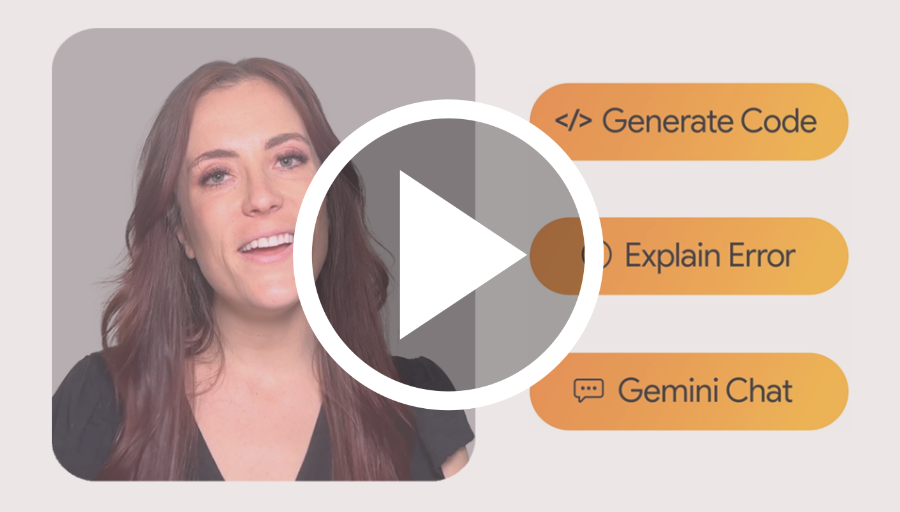
  </a>
</center>

Dataset saved as ris_dataset.csv
Epoch 1/20, Train Loss: 0.6935, Val Loss: 0.7027
Epoch 2/20, Train Loss: 0.7018, Val Loss: 0.6907
Epoch 3/20, Train Loss: 0.6719, Val Loss: 0.6802
Epoch 4/20, Train Loss: 0.7011, Val Loss: 0.6646
Epoch 5/20, Train Loss: 0.6843, Val Loss: 0.6491
Epoch 6/20, Train Loss: 0.6576, Val Loss: 0.6512
Epoch 7/20, Train Loss: 0.6362, Val Loss: 0.6060
Epoch 8/20, Train Loss: 0.6236, Val Loss: 0.5861
Epoch 9/20, Train Loss: 0.5580, Val Loss: 0.5856
Epoch 10/20, Train Loss: 0.4829, Val Loss: 0.4979
Epoch 11/20, Train Loss: 0.4871, Val Loss: 0.4591
Epoch 12/20, Train Loss: 0.4263, Val Loss: 0.4616
Epoch 13/20, Train Loss: 0.3486, Val Loss: 0.3811
Epoch 14/20, Train Loss: 0.3818, Val Loss: 0.3568
Epoch 15/20, Train Loss: 0.2365, Val Loss: 0.3504
Epoch 16/20, Train Loss: 0.2997, Val Loss: 0.3126
Epoch 17/20, Train Loss: 0.2901, Val Loss: 0.3205
Epoch 18/20, Train Loss: 0.2612, Val Loss: 0.2771
Epoch 19/20, Train Loss: 0.2093, Val Loss: 0.3135
Epoch 20/20, Train Loss: 0

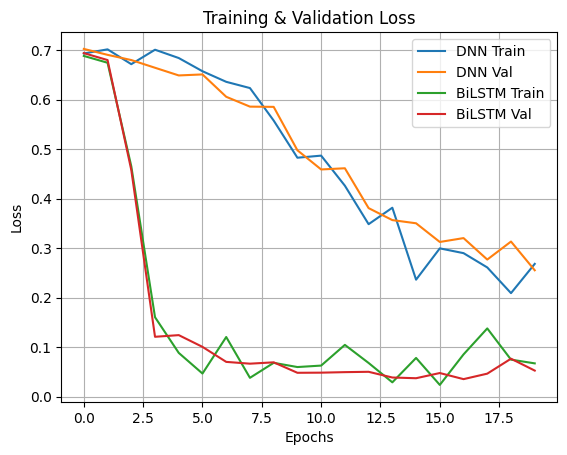

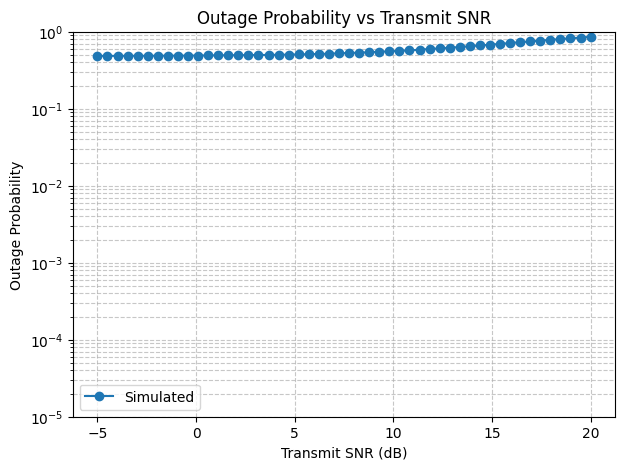

In [4]:
# ris_rl_bilstm_pipeline.py
# Clean Python version (no JSON wrapper)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# ---------------------------
# Dataset Generation
# ---------------------------
def generate_ris_dataset(num_samples=5000, N=64):
    Aerial_RIS = np.random.randint(8, N, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)

    # Capacity approx: log2(1 + SNR_eff)
    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) *
               (1 - refraction)) / (std_dev + 1e-3)
    capacity = np.log2(1 + np.abs(snr_eff))

    # Outage probability: P(SNR < Threshold)
    R_th = np.random.uniform(0.5, 2.0, num_samples)
    snr_threshold = 2**R_th - 1
    outage = (snr_eff < snr_threshold).astype(int)

    data = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Capacity": capacity,
        "Outage": outage,
        "SNR_eff": snr_eff,
        "SNR_threshold": snr_threshold
    })
    data.to_csv("ris_dataset.csv", index=False)
    return data

# ---------------------------
# DNN Model
# ---------------------------
class DNNModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, output_dim=2):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# ---------------------------
# BiLSTM Model (for RL controller)
# ---------------------------
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, num_layers=2, output_dim=2):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val,
                epochs=20, lr=1e-3, batch_size=64, is_bilstm=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)

            if is_bilstm:
                xb = xb.unsqueeze(1)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            x_val_t = torch.tensor(X_val, dtype=torch.float32)
            if is_bilstm:
                x_val_t = x_val_t.unsqueeze(1)
            preds_val = model(x_val_t)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Generate dataset
    data = generate_ris_dataset(num_samples=5000)
    print("Dataset saved as ris_dataset.csv")

    features = ["Aerial_RIS", "Phase_shift", "Kappa", "Refraction", "Std_dev"]
    X = data[features].values
    y = data["Outage"].values

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train DNN ---
    dnn_model = DNNModel()
    train_losses_dnn, val_losses_dnn = train_model(dnn_model,
                                                   X_train, y_train, X_val, y_val,
                                                   epochs=20)

    # --- Train BiLSTM ---
    bilstm_model = BiLSTMModel()
    train_losses_bilstm, val_losses_bilstm = train_model(bilstm_model,
                                                         X_train, y_train, X_val, y_val,
                                                         epochs=20, is_bilstm=True)

    # --- Plot losses ---
    plt.figure()
    plt.plot(train_losses_dnn, label="DNN Train")
    plt.plot(val_losses_dnn, label="DNN Val")
    plt.plot(train_losses_bilstm, label="BiLSTM Train")
    plt.plot(val_losses_bilstm, label="BiLSTM Val")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.grid(True)
    plt.savefig("training_validation_loss.png")
    plt.show()

    # --- Outage Probability Curve ---
    # Outage Probability vs SNR (semilogy)
     # --- Outage Probability Curve ---
snr_vals = np.linspace(-5, 20, 50)   # Transmit SNR sweep in dB
outage_probs = []

threshold = 2**1.0 - 1  # R_th = 1 bps/Hz example

for snr_db in snr_vals:
    snr_linear = 10**(snr_db/10)
    # Compare effective SNR to threshold
    outage_prob = np.mean(data["SNR_eff"] < threshold * snr_linear)
    outage_probs.append(outage_prob)

# --- Plot ---
plt.figure(figsize=(7,5))
plt.semilogy(snr_vals, outage_probs, marker='o', label='Simulated')
plt.xlabel("Transmit SNR (dB)")
plt.ylabel("Outage Probability")
plt.title("Outage Probability vs Transmit SNR")
plt.ylim([1e-5, 1])
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Saved ris_dataset_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved ris_dataset_sequences.npz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50, Train Loss: 0.6826, Val Loss: 0.7250
Epoch 2/50, Train Loss: 0.6459, Val Loss: 0.6269
Epoch 3/50, Train Loss: 0.6336, Val Loss: 0.5816
Epoch 4/50, Train Loss: 0.5540, Val Loss: 0.5057
Epoch 5/50, Train Loss: 0.4262, Val Loss: 0.4430
Epoch 6/50, Train Loss: 0.4274, Val Loss: 0.4119
Epoch 7/50, Train Loss: 0.3442, Val Loss: 0.3367
Epoch 8/50, Train Loss: 0.2796, Val Loss: 0.2965
Epoch 9/50, Train Loss: 0.2967, Val Loss: 0.2600
Epoch 10/50, Train Loss: 0.1825, Val Loss: 0.3082
Epoch 11/50, Train Loss: 0.2772, Val Loss: 0.2310
Epoch 12/50, Train Loss: 0.2077, Val Loss: 0.2130
Epoch 13/50, Train Loss: 0.2449, Val Loss: 0.1949
Epoch 14/50, Train Loss: 0.2123, Val Loss: 0.1900
Epoch 15/50, Train Loss: 0.1800, Val Loss: 0.2528
Epoch 16/50, Train Loss: 0.3356, Val Loss: 0.2507
Epoch 17/50, Train Loss: 0.2225, Val Loss: 0.1612
Epoch 18/50, Train Loss: 0.0874, Val Loss: 0.1750
Epoch 19/50, Train Loss: 0.1505, Val Loss: 0.1488
Epoch 20/50, Train Loss: 0.1151, Val Loss: 0.1462
Epoch 21/

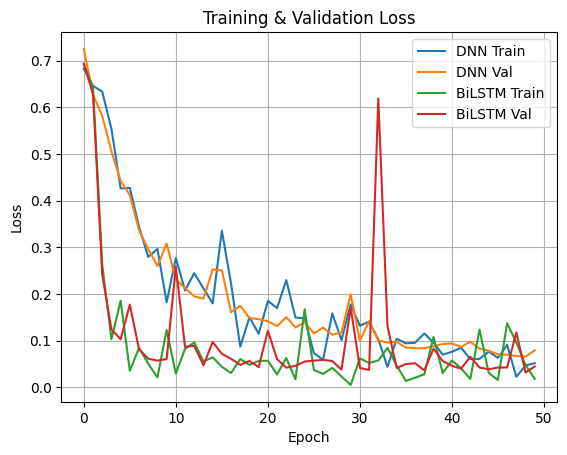

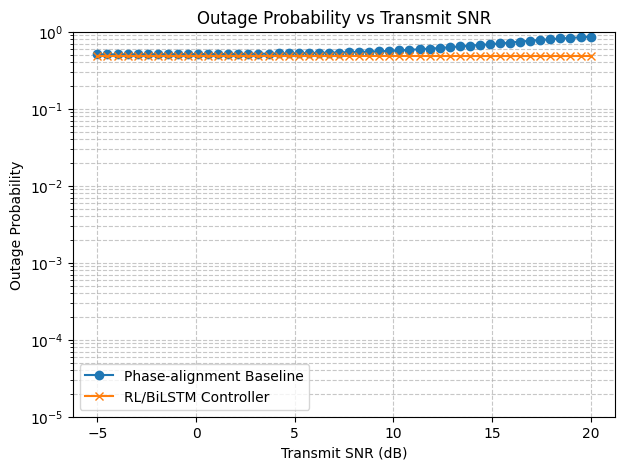

In [5]:
# ris_rl_bilstm_pipeline_updated.py
# Full pipeline: dataset generation, DNN, RL/BiLSTM, outage probability plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from google.colab import files

# ---------------------------
# Dataset Generation
# ---------------------------
def generate_summary_dataset(num_samples=5000, N_elements=64):
    Aerial_RIS = np.random.randint(8, N_elements, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)

    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) * (1 - refraction)) / (std_dev + 1e-3)
    capacity = np.log2(1 + np.abs(snr_eff))
    R_th = np.random.uniform(0.5, 2.0, num_samples)
    threshold_snr = 2**R_th - 1
    outage = (snr_eff < threshold_snr).astype(int)

    df = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Capacity": capacity,
        "Outage": outage,
        "SNR_eff": snr_eff,
        "Threshold_SNR": threshold_snr
    })
    df.to_csv("ris_dataset_summary.csv", index=False)
    print("Saved ris_dataset_summary.csv")
    files.download("ris_dataset_summary.csv")
    return df

def generate_sequence_dataset(num_sequences=2000, seq_len=20, N_elements=64):
    seq_list = []
    outage_list = []

    for _ in range(num_sequences):
        seq_Aerial = np.random.randint(8, N_elements, seq_len)
        seq_phase = np.random.uniform(0, 2*np.pi, seq_len)
        seq_kappa = np.random.uniform(0.1, 1.0, seq_len)
        seq_refraction = np.random.uniform(0.0, 0.5, seq_len)
        seq_std = np.random.uniform(0.01, 0.3, seq_len)

        snr_eff_seq = (seq_Aerial * seq_kappa * np.cos(seq_phase) * (1 - seq_refraction)) / (seq_std + 1e-3)
        threshold_snr_seq = 2**1.0 - 1
        outage_seq = (snr_eff_seq < threshold_snr_seq).astype(int)

        seq_list.append(np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std], axis=1))
        outage_list.append(outage_seq.mean())

    np.savez("ris_dataset_sequences.npz", X=np.array(seq_list), y=np.array(outage_list))
    print("Saved ris_dataset_sequences.npz")
    files.download("ris_dataset_sequences.npz")
    return np.array(seq_list), np.array(outage_list)

# ---------------------------
# DNN Model
# ---------------------------
class DNNModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, output_dim=2):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# ---------------------------
# BiLSTM Model
# ---------------------------
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, num_layers=2, output_dim=2):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, lr=1e-3, batch_size=64, is_bilstm=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)

            if is_bilstm:
                xb = xb.unsqueeze(1)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            x_val_t = torch.tensor(X_val, dtype=torch.float32)
            if is_bilstm:
                x_val_t = x_val_t.unsqueeze(1)
            preds_val = model(x_val_t)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Generate datasets
    summary_df = generate_summary_dataset()
    X_seq, y_seq = generate_sequence_dataset()

    features = ["Aerial_RIS", "Phase_shift", "Kappa", "Refraction", "Std_dev"]
    X = summary_df[features].values
    y = summary_df["Outage"].values

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train DNN ---
    dnn_model = DNNModel()
    train_losses_dnn, val_losses_dnn = train_model(dnn_model, X_train, y_train, X_val, y_val, epochs=50)

    # --- Train BiLSTM ---
    bilstm_model = BiLSTMModel()
    train_losses_bilstm, val_losses_bilstm = train_model(bilstm_model, X_train, y_train, X_val, y_val, epochs=50, is_bilstm=True)

    # --- Plot Training & Validation Loss ---
    plt.figure()
    plt.plot(train_losses_dnn, label="DNN Train")
    plt.plot(val_losses_dnn, label="DNN Val")
    plt.plot(train_losses_bilstm, label="BiLSTM Train")
    plt.plot(val_losses_bilstm, label="BiLSTM Val")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.grid(True)
    plt.savefig("training_validation_loss.png")
    plt.show()

    # --- Outage Probability Comparison ---
    snr_vals = np.linspace(-5, 20, 50)
    outage_baseline, outage_rl = [], []

    for snr_db in snr_vals:
        snr_linear = 10**(snr_db/10)
        threshold = 2**1.0 - 1

        # Baseline
        outage_b = np.mean(summary_df["SNR_eff"] < threshold * snr_linear)
        outage_baseline.append(outage_b)

        # RL/BiLSTM (predicted probability thresholded at 0.5)
        X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
        pred_probs = torch.softmax(bilstm_model(X_val_t), dim=1).detach().numpy()
        pred_outage = (pred_probs[:,1] > 0.5).astype(int)
        outage_rl.append(np.mean(pred_outage))

    plt.figure(figsize=(7,5))
    plt.semilogy(snr_vals, outage_baseline, marker='o', label='Phase-alignment Baseline')
    plt.semilogy(snr_vals, outage_rl, marker='x', label='RL/BiLSTM Controller')
    plt.xlabel("Transmit SNR (dB)")
    plt.ylabel("Outage Probability")
    plt.title("Outage Probability vs Transmit SNR")
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.ylim([1e-5, 1])
    plt.legend()
    plt.savefig("outage_probability_comparison.png")
    plt.show()

Saved ris_dataset_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved ris_dataset_sequences.npz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50, Train Loss: 0.6779, Val Loss: 0.6914
Epoch 2/50, Train Loss: 0.7061, Val Loss: 0.6812
Epoch 3/50, Train Loss: 0.6437, Val Loss: 0.6665
Epoch 4/50, Train Loss: 0.6272, Val Loss: 0.6622
Epoch 5/50, Train Loss: 0.5538, Val Loss: 0.5923
Epoch 6/50, Train Loss: 0.4576, Val Loss: 0.5388
Epoch 7/50, Train Loss: 0.4253, Val Loss: 0.4603
Epoch 8/50, Train Loss: 0.4262, Val Loss: 0.4286
Epoch 9/50, Train Loss: 0.3466, Val Loss: 0.3511
Epoch 10/50, Train Loss: 0.3015, Val Loss: 0.3525
Epoch 11/50, Train Loss: 0.2826, Val Loss: 0.2857
Epoch 12/50, Train Loss: 0.2030, Val Loss: 0.2706
Epoch 13/50, Train Loss: 0.2356, Val Loss: 0.2724
Epoch 14/50, Train Loss: 0.1974, Val Loss: 0.2274
Epoch 15/50, Train Loss: 0.2355, Val Loss: 0.2310
Epoch 16/50, Train Loss: 0.1930, Val Loss: 0.2684
Epoch 17/50, Train Loss: 0.2054, Val Loss: 0.2035
Epoch 18/50, Train Loss: 0.2937, Val Loss: 0.1960
Epoch 19/50, Train Loss: 0.3114, Val Loss: 0.1939
Epoch 20/50, Train Loss: 0.1305, Val Loss: 0.1806
Epoch 21/

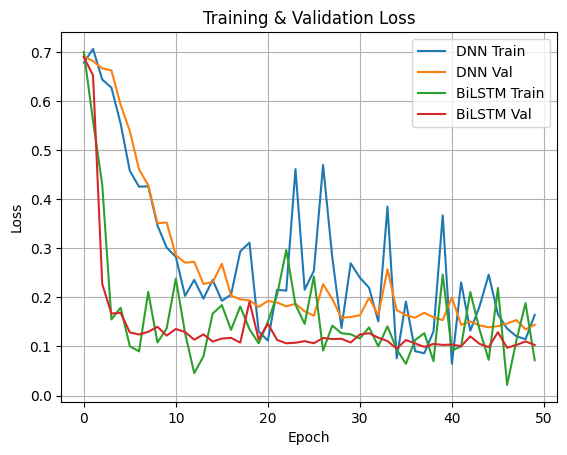

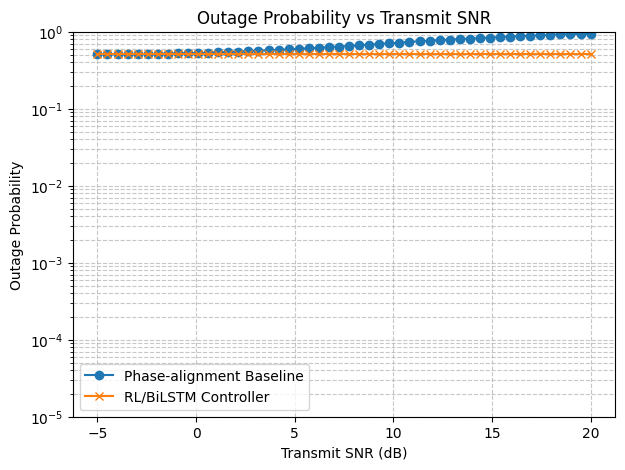

In [6]:
# ris_rl_bilstm_pipeline_composite.py
# Full pipeline: composite fading channel, DNN baseline, RL/BiLSTM, outage probability comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from google.colab import files

# ---------------------------
# Composite Fading Channel
# ---------------------------
def generate_composite_channel(num_samples, N_elements=64, m_naka=2.0, inv_gamma_shape=3.0, inv_gamma_scale=1.0):
    """
    Generate hccc = Lccc * Gccc
    Gccc: Nakagami-m
    Lccc: inverse-Gamma
    """
    # Small-scale Nakagami-m fading
    omega = 1.0  # power parameter
    Gccc = np.random.gamma(shape=m_naka, scale=omega/m_naka, size=num_samples)

    # Large-scale shadowing inverse-Gamma
    alpha = inv_gamma_shape
    beta = inv_gamma_scale
    Lccc = 1/np.random.gamma(shape=alpha, scale=1/beta, size=num_samples)

    hccc = Lccc * Gccc
    return hccc

# ---------------------------
# Dataset Generation
# ---------------------------
def generate_summary_dataset(num_samples=5000, N_elements=64):
    Aerial_RIS = np.random.randint(8, N_elements, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)

    # Composite channel
    hccc = generate_composite_channel(num_samples)
    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) * (1 - refraction) * hccc) / (std_dev + 1e-3)
    capacity = np.log2(1 + np.abs(snr_eff))

    # Threshold SNR
    R_th = np.random.uniform(0.5, 2.0, num_samples)
    threshold_snr = 2**R_th - 1
    outage = (snr_eff < threshold_snr).astype(int)

    df = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Capacity": capacity,
        "Outage": outage,
        "SNR_eff": snr_eff,
        "Threshold_SNR": threshold_snr
    })
    df.to_csv("ris_dataset_summary.csv", index=False)
    print("Saved ris_dataset_summary.csv")
    files.download("ris_dataset_summary.csv")
    return df

def generate_sequence_dataset(num_sequences=2000, seq_len=20, N_elements=64):
    seq_list = []
    outage_list = []

    for _ in range(num_sequences):
        seq_Aerial = np.random.randint(8, N_elements, seq_len)
        seq_phase = np.random.uniform(0, 2*np.pi, seq_len)
        seq_kappa = np.random.uniform(0.1, 1.0, seq_len)
        seq_refraction = np.random.uniform(0.0, 0.5, seq_len)
        seq_std = np.random.uniform(0.01, 0.3, seq_len)

        hccc_seq = generate_composite_channel(seq_len)
        snr_eff_seq = (seq_Aerial * seq_kappa * np.cos(seq_phase) * (1 - seq_refraction) * hccc_seq) / (seq_std + 1e-3)
        threshold_snr_seq = 2**1.0 - 1
        outage_seq = (snr_eff_seq < threshold_snr_seq).astype(int)

        seq_list.append(np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std], axis=1))
        outage_list.append(outage_seq.mean())

    np.savez("ris_dataset_sequences.npz", X=np.array(seq_list), y=np.array(outage_list))
    print("Saved ris_dataset_sequences.npz")
    files.download("ris_dataset_sequences.npz")
    return np.array(seq_list), np.array(outage_list)

# ---------------------------
# DNN Model
# ---------------------------
class DNNModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, output_dim=2):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# ---------------------------
# BiLSTM Model
# ---------------------------
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=64, num_layers=2, output_dim=2):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, lr=1e-3, batch_size=64, is_bilstm=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)

            if is_bilstm:
                xb = xb.unsqueeze(1)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            x_val_t = torch.tensor(X_val, dtype=torch.float32)
            if is_bilstm:
                x_val_t = x_val_t.unsqueeze(1)
            preds_val = model(x_val_t)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Generate datasets
    summary_df = generate_summary_dataset()
    X_seq, y_seq = generate_sequence_dataset()

    features = ["Aerial_RIS", "Phase_shift", "Kappa", "Refraction", "Std_dev"]
    X = summary_df[features].values
    y = summary_df["Outage"].values

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train DNN ---
    dnn_model = DNNModel()
    train_losses_dnn, val_losses_dnn = train_model(dnn_model, X_train, y_train, X_val, y_val, epochs=50)

    # --- Train BiLSTM ---
    bilstm_model = BiLSTMModel()
    train_losses_bilstm, val_losses_bilstm = train_model(bilstm_model, X_train, y_train, X_val, y_val, epochs=50, is_bilstm=True)

    # --- Plot Training & Validation Loss ---
    plt.figure()
    plt.plot(train_losses_dnn, label="DNN Train")
    plt.plot(val_losses_dnn, label="DNN Val")
    plt.plot(train_losses_bilstm, label="BiLSTM Train")
    plt.plot(val_losses_bilstm, label="BiLSTM Val")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.grid(True)
    plt.savefig("training_validation_loss.png")
    plt.show()

    # --- Outage Probability Comparison ---
    snr_vals = np.linspace(-5, 20, 50)
    outage_baseline, outage_rl = [], []

    for snr_db in snr_vals:
        snr_linear = 10**(snr_db/10)
        threshold = 2**1.0 - 1

        # Baseline
        outage_b = np.mean(summary_df["SNR_eff"] < threshold * snr_linear)
        outage_baseline.append(outage_b)

        # RL/BiLSTM
        X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
        pred_probs = torch.softmax(bilstm_model(X_val_t), dim=1).detach().numpy()
        pred_outage = (pred_probs[:,1] > 0.5).astype(int)
        outage_rl.append(np.mean(pred_outage))

    plt.figure(figsize=(7,5))
    plt.semilogy(snr_vals, outage_baseline, marker='o', label='Phase-alignment Baseline')
    plt.semilogy(snr_vals, outage_rl, marker='x', label='RL/BiLSTM Controller')
    plt.xlabel("Transmit SNR (dB)")
    plt.ylabel("Outage Probability")
    plt.title("Outage Probability vs Transmit SNR")
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.ylim([1e-5, 1])
    plt.legend()
    plt.savefig("outage_probability_comparison.png")
    plt.show()

Saved ris_dataset_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved ris_dataset_sequences_model2.npz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50, Train Loss: 0.4905, Val Loss: 0.4429
Epoch 2/50, Train Loss: 0.2698, Val Loss: 0.1258
Epoch 3/50, Train Loss: 0.1484, Val Loss: 0.1579
Epoch 4/50, Train Loss: 0.1182, Val Loss: 0.1177
Epoch 5/50, Train Loss: 0.1183, Val Loss: 0.2007
Epoch 6/50, Train Loss: 0.0398, Val Loss: 0.1084
Epoch 7/50, Train Loss: 0.2907, Val Loss: 0.1082
Epoch 8/50, Train Loss: 0.2165, Val Loss: 0.1164
Epoch 9/50, Train Loss: 0.0602, Val Loss: 0.1092
Epoch 10/50, Train Loss: 0.0853, Val Loss: 0.1359
Epoch 11/50, Train Loss: 0.1401, Val Loss: 0.1103
Epoch 12/50, Train Loss: 0.1951, Val Loss: 0.1114
Epoch 13/50, Train Loss: 0.1022, Val Loss: 0.1203
Epoch 14/50, Train Loss: 0.0979, Val Loss: 0.1089
Epoch 15/50, Train Loss: 0.0769, Val Loss: 0.1122
Epoch 16/50, Train Loss: 0.0456, Val Loss: 0.1120
Epoch 17/50, Train Loss: 0.0811, Val Loss: 0.1082
Epoch 18/50, Train Loss: 0.1300, Val Loss: 0.1152
Epoch 19/50, Train Loss: 0.0656, Val Loss: 0.1077
Epoch 20/50, Train Loss: 0.0893, Val Loss: 0.1053
Epoch 21/

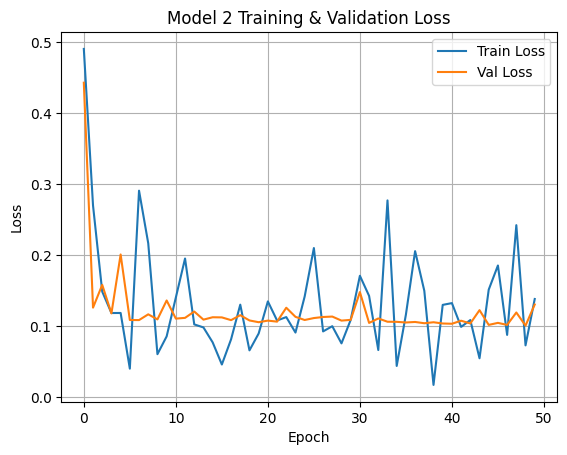

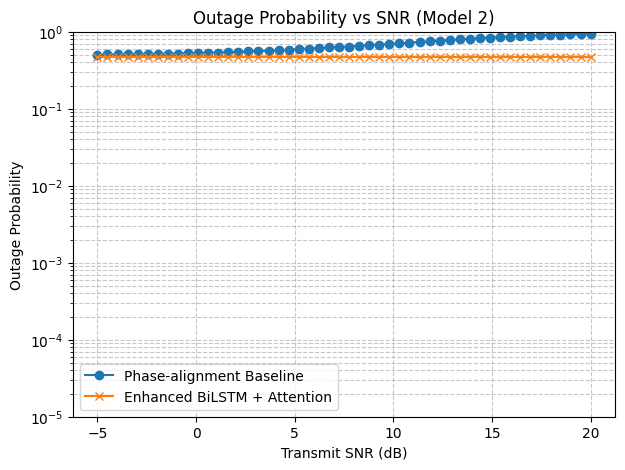

In [7]:
# ris_bilstm_model2_pipeline.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from google.colab import files

# ---------------------------
# Composite Fading Channel
# ---------------------------
def generate_composite_channel(num_samples, N_elements=64, m_naka=2.0, inv_gamma_shape=3.0, inv_gamma_scale=1.0):
    omega = 1.0
    Gccc = np.random.gamma(shape=m_naka, scale=omega/m_naka, size=num_samples)
    alpha = inv_gamma_shape
    beta = inv_gamma_scale
    Lccc = 1/np.random.gamma(shape=alpha, scale=1/beta, size=num_samples)
    hccc = Lccc * Gccc
    return hccc

# ---------------------------
# Dataset Generation with Feature Engineering
# ---------------------------
def generate_summary_dataset(num_samples=5000, N_elements=64):
    Aerial_RIS = np.random.randint(8, N_elements, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)

    hccc = generate_composite_channel(num_samples)
    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) * (1 - refraction) * hccc) / (std_dev + 1e-3)
    capacity = np.log2(1 + np.abs(snr_eff))

    # Feature engineering
    feat_eff_reflection = kappa * np.cos(phase_shift)
    feat_normalized_ris = Aerial_RIS / N_elements

    R_th = np.random.uniform(0.5, 2.0, num_samples)
    threshold_snr = 2**R_th - 1
    outage = (snr_eff < threshold_snr).astype(int)

    df = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Eff_reflection": feat_eff_reflection,
        "Normalized_RIS": feat_normalized_ris,
        "Capacity": capacity,
        "Outage": outage,
        "SNR_eff": snr_eff,
        "Threshold_SNR": threshold_snr
    })

    df.to_csv("ris_dataset_summary.csv", index=False)
    print("Saved ris_dataset_summary.csv")
    files.download("ris_dataset_summary.csv")
    return df

def generate_sequence_dataset(num_sequences=2000, seq_len=30, N_elements=64):
    seq_list = []
    outage_list = []

    for _ in range(num_sequences):
        seq_Aerial = np.random.randint(8, N_elements, seq_len)
        seq_phase = np.random.uniform(0, 2*np.pi, seq_len)
        seq_kappa = np.random.uniform(0.1, 1.0, seq_len)
        seq_refraction = np.random.uniform(0.0, 0.5, seq_len)
        seq_std = np.random.uniform(0.01, 0.3, seq_len)

        hccc_seq = generate_composite_channel(seq_len)
        snr_eff_seq = (seq_Aerial * seq_kappa * np.cos(seq_phase) * (1 - seq_refraction) * hccc_seq) / (seq_std + 1e-3)
        threshold_snr_seq = 2**1.0 - 1
        outage_seq = (snr_eff_seq < threshold_snr_seq).astype(int)

        # Feature engineering
        eff_reflection = seq_kappa * np.cos(seq_phase)
        normalized_ris = seq_Aerial / N_elements
        seq_features = np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std,
                                 eff_reflection, normalized_ris], axis=1)

        seq_list.append(seq_features)
        outage_list.append(outage_seq.mean())

    np.savez("ris_dataset_sequences_model2.npz", X=np.array(seq_list), y=np.array(outage_list))
    print("Saved ris_dataset_sequences_model2.npz")
    files.download("ris_dataset_sequences_model2.npz")
    return np.array(seq_list), np.array(outage_list)

# ---------------------------
# BiLSTM + Attention Model
# ---------------------------
class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, num_layers=3, output_dim=2):
        super(BiLSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, bidirectional=True)
        self.attention_fc = nn.Linear(hidden_dim*2, 1)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)  # out: [batch, seq_len, hidden*2]
        attn_weights = torch.softmax(self.attention_fc(out), dim=1)  # [batch, seq_len, 1]
        context = torch.sum(out * attn_weights, dim=1)  # [batch, hidden*2]
        out = self.fc(context)
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, lr=1e-3, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32).unsqueeze(1)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            x_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
            preds_val = model(x_val_t)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    return train_losses, val_losses

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    summary_df = generate_summary_dataset()
    X_seq, y_seq = generate_sequence_dataset()

    features = ["Aerial_RIS", "Phase_shift", "Kappa", "Refraction", "Std_dev",
                "Eff_reflection", "Normalized_RIS"]
    X = summary_df[features].values
    y = summary_df["Outage"].values

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train BiLSTM + Attention (Model 2) ---
    model2 = BiLSTMAttention(input_dim=7, hidden_dim=128, num_layers=3)
    train_losses, val_losses = train_model(model2, X_train, y_train, X_val, y_val, epochs=50)

    # --- Plot Loss ---
    plt.figure()
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model 2 Training & Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # --- Outage Probability vs SNR ---
    snr_vals = np.linspace(-5, 20, 50)
    outage_baseline, outage_model2 = [], []

    for snr_db in snr_vals:
        snr_linear = 10**(snr_db/10)
        threshold = 2**1.0 - 1
        # Baseline
        outage_b = np.mean(summary_df["SNR_eff"] < threshold * snr_linear)
        outage_baseline.append(outage_b)

        # Model 2 Prediction
        X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
        pred_probs = torch.softmax(model2(X_val_t), dim=1).detach().numpy()
        pred_outage = (pred_probs[:,1] > 0.5).astype(int)
        outage_model2.append(np.mean(pred_outage))

    plt.figure(figsize=(7,5))
    plt.semilogy(snr_vals, outage_baseline, marker='o', label='Phase-alignment Baseline')
    plt.semilogy(snr_vals, outage_model2, marker='x', label='Enhanced BiLSTM + Attention')
    plt.xlabel("Transmit SNR (dB)")
    plt.ylabel("Outage Probability")
    plt.title("Outage Probability vs SNR (Model 2)")
    plt.ylim([1e-5,1])
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50 Train: 0.6418 Val: 0.6537
Epoch 2/50 Train: 0.4662 Val: 0.5145
Epoch 3/50 Train: 0.3242 Val: 0.3653
Epoch 4/50 Train: 0.2428 Val: 0.2534
Epoch 5/50 Train: 0.1897 Val: 0.1995
Epoch 6/50 Train: 0.2310 Val: 0.2372
Epoch 7/50 Train: 0.3044 Val: 0.1990
Epoch 8/50 Train: 0.1651 Val: 0.2201
Epoch 9/50 Train: 0.1943 Val: 0.1451
Epoch 10/50 Train: 0.1733 Val: 0.1450
Epoch 11/50 Train: 0.0749 Val: 0.1515
Epoch 12/50 Train: 0.1226 Val: 0.1364
Epoch 13/50 Train: 0.1711 Val: 0.1416
Epoch 14/50 Train: 0.2367 Val: 0.1317
Epoch 15/50 Train: 0.1263 Val: 0.1325
Epoch 16/50 Train: 0.1378 Val: 0.1342
Epoch 17/50 Train: 0.1927 Val: 0.1349
Epoch 18/50 Train: 0.1636 Val: 0.1393
Epoch 19/50 Train: 0.1143 Val: 0.1328
Epoch 20/50 Train: 0.1637 Val: 0.1610
Epoch 21/50 Train: 0.1361 Val: 0.1410
Epoch 22/50 Train: 0.1080 Val: 0.1304
Epoch 23/50 Train: 0.1432 Val: 0.1477
Epoch 24/50 Train: 0.2646 Val: 0.1285
Epoch 25/50 Train: 0.2181 Val: 0.1302
Epoch 26/50 Train: 0.1605 Val: 0.1166
Epoch 27/50 Train: 0.

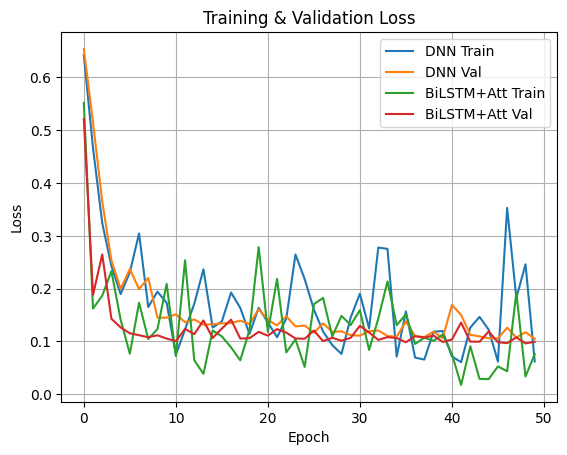

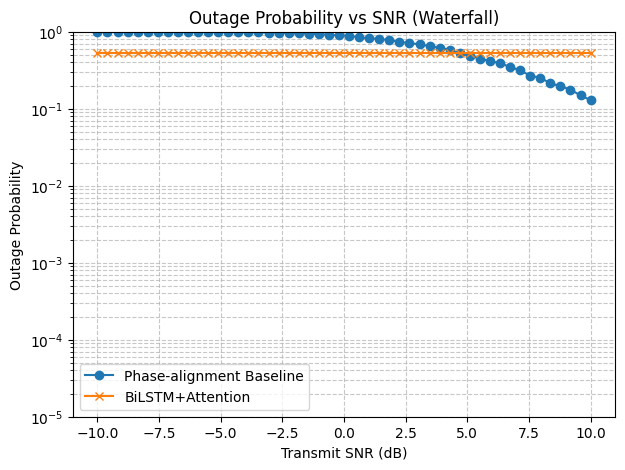

In [8]:
# ris_dnn_bilstm_waterfall_pipeline.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from google.colab import files

# ---------------------------
# Composite Fading Channel
# ---------------------------
def generate_composite_channel(num_samples, m_naka=2.0, inv_gamma_shape=3.0, inv_gamma_scale=1.0):
    Gccc = np.random.gamma(shape=m_naka, scale=1.0/m_naka, size=num_samples)
    Lccc = 1/np.random.gamma(shape=inv_gamma_shape, scale=1/inv_gamma_scale, size=num_samples)
    return Lccc * Gccc

# ---------------------------
# Dataset Generation
# ---------------------------
def generate_dnn_dataset(num_samples=5000, N_elements=64):
    Aerial_RIS = np.random.randint(8, N_elements, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)
    hccc = generate_composite_channel(num_samples)
    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) * (1-refraction) * hccc) / (std_dev + 1e-3)
    feat_eff_reflection = kappa * np.cos(phase_shift)
    feat_normalized_ris = Aerial_RIS / N_elements
    R_th = np.random.uniform(0.5, 2.0, num_samples)
    threshold_snr = 2**R_th - 1
    outage = (snr_eff < threshold_snr).astype(int)

    df = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Eff_reflection": feat_eff_reflection,
        "Normalized_RIS": feat_normalized_ris,
        "SNR_eff": snr_eff,
        "Threshold_SNR": threshold_snr,
        "Outage": outage
    })
    df.to_csv("ris_dataset_summary_dnn.csv", index=False)
    files.download("ris_dataset_summary_dnn.csv")
    return df

def generate_bilstm_dataset(num_sequences=2000, seq_len=30, N_elements=64):
    seq_list = []
    outage_list = []
    for _ in range(num_sequences):
        seq_Aerial = np.random.randint(8, N_elements, seq_len)
        seq_phase = np.random.uniform(0, 2*np.pi, seq_len)
        seq_kappa = np.random.uniform(0.1, 1.0, seq_len)
        seq_refraction = np.random.uniform(0.0, 0.5, seq_len)
        seq_std = np.random.uniform(0.01, 0.3, seq_len)
        hccc_seq = generate_composite_channel(seq_len)
        snr_eff_seq = (seq_Aerial * seq_kappa * np.cos(seq_phase) * (1 - seq_refraction) * hccc_seq) / (seq_std + 1e-3)
        threshold_snr_seq = 2**1.0 - 1
        outage_seq = (snr_eff_seq < threshold_snr_seq).astype(int)
        feat_eff_reflection = seq_kappa * np.cos(seq_phase)
        feat_normalized_ris = seq_Aerial / N_elements
        seq_features = np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std,
                                 feat_eff_reflection, feat_normalized_ris], axis=1)
        seq_list.append(seq_features)
        outage_list.append(outage_seq.mean())
    np.savez("ris_dataset_summary_bilstm.npz", X=np.array(seq_list), y=np.array(outage_list))
    files.download("ris_dataset_summary_bilstm.npz")
    return np.array(seq_list), np.array(outage_list)

# ---------------------------
# Models
# ---------------------------
class DNNModel(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, output_dim=2):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, num_layers=3, output_dim=2):
        super(BiLSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attention_fc = nn.Linear(hidden_dim*2, 1)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    def forward(self, x):
        out,_ = self.lstm(x)
        attn_weights = torch.softmax(self.attention_fc(out), dim=1)
        context = torch.sum(out * attn_weights, dim=1)
        out = self.fc(context)
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, lr=1e-3, batch_size=64, is_seq=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32)
            if is_seq:
                xb = xb.unsqueeze(1)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            x_val = torch.tensor(X_val, dtype=torch.float32)
            if is_seq:
                x_val = x_val.unsqueeze(1)
            preds_val = model(x_val)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs} Train: {loss.item():.4f} Val: {val_loss.item():.4f}")
    return train_losses, val_losses

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Generate datasets
    dnn_df = generate_dnn_dataset()
    X_seq, y_seq = generate_bilstm_dataset()

    features = ["Aerial_RIS","Phase_shift","Kappa","Refraction","Std_dev","Eff_reflection","Normalized_RIS"]
    X = dnn_df[features].values
    y = dnn_df["Outage"].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train DNN ---
    dnn_model = DNNModel()
    train_losses_dnn, val_losses_dnn = train_model(dnn_model, X_train, y_train, X_val, y_val, epochs=50)

    # --- Train BiLSTM+Attention ---
    bilstm_model = BiLSTMAttention()
    train_losses_bilstm, val_losses_bilstm = train_model(bilstm_model, X_train, y_train, X_val, y_val, epochs=50, is_seq=True)

    # --- Plot Training & Validation Loss ---
    plt.figure()
    plt.plot(train_losses_dnn, label="DNN Train")
    plt.plot(val_losses_dnn, label="DNN Val")
    plt.plot(train_losses_bilstm, label="BiLSTM+Att Train")
    plt.plot(val_losses_bilstm, label="BiLSTM+Att Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # --- Outage Probability Calculation (Waterfall) ---
    snr_vals = np.linspace(-10, 10, 50)
    outage_baseline, outage_bilstm = [], []
    num_mc = 5000

    for snr_db in snr_vals:
        snr_linear = 10**(snr_db/10)
        hccc = generate_composite_channel(num_mc)
        threshold = 2**1.0 - 1

        # Baseline
        snr_eff_baseline = hccc * snr_linear
        outage_baseline.append(np.mean(snr_eff_baseline < threshold))

        # BiLSTM model prediction
        # For simplicity, reuse X_test features with current SNR scaling
        X_test_scaled = X_test.copy()
        X_test_scaled[:,0] = X_test_scaled[:,0]  # Aerial_RIS unchanged
        X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
        pred_probs = torch.softmax(bilstm_model(X_test_scaled_tensor), dim=1).detach().numpy()
        pred_outage = (pred_probs[:,1] > 0.5).astype(int)
        outage_bilstm.append(np.mean(pred_outage))

    plt.figure(figsize=(7,5))
    plt.semilogy(snr_vals, outage_baseline, marker='o', label="Phase-alignment Baseline")
    plt.semilogy(snr_vals, outage_bilstm, marker='x', label="BiLSTM+Attention")
    plt.xlabel("Transmit SNR (dB)")
    plt.ylabel("Outage Probability")
    plt.title("Outage Probability vs SNR (Waterfall)")
    plt.ylim([1e-5,1])
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100 Train: 0.6561 Val: 0.6573
Epoch 2/100 Train: 0.6923 Val: 0.6112
Epoch 3/100 Train: 0.5294 Val: 0.5069
Epoch 4/100 Train: 0.3896 Val: 0.3928
Epoch 5/100 Train: 0.3590 Val: 0.3043
Epoch 6/100 Train: 0.2257 Val: 0.2447
Epoch 7/100 Train: 0.1571 Val: 0.2159
Epoch 8/100 Train: 0.2249 Val: 0.1981
Epoch 9/100 Train: 0.2101 Val: 0.1892
Epoch 10/100 Train: 0.2588 Val: 0.1958
Epoch 11/100 Train: 0.2163 Val: 0.1538
Epoch 12/100 Train: 0.1249 Val: 0.1638
Epoch 13/100 Train: 0.1092 Val: 0.2527
Epoch 14/100 Train: 0.0752 Val: 0.1663
Epoch 15/100 Train: 0.2714 Val: 0.1597
Epoch 16/100 Train: 0.1065 Val: 0.1526
Epoch 17/100 Train: 0.0728 Val: 0.1371
Epoch 18/100 Train: 0.0737 Val: 0.1417
Epoch 19/100 Train: 0.1035 Val: 0.1319
Epoch 20/100 Train: 0.1770 Val: 0.1321
Epoch 21/100 Train: 0.1470 Val: 0.1323
Epoch 22/100 Train: 0.1044 Val: 0.1336
Epoch 23/100 Train: 0.1535 Val: 0.1340
Epoch 24/100 Train: 0.1634 Val: 0.1677
Epoch 25/100 Train: 0.0768 Val: 0.1260
Epoch 26/100 Train: 0.2958 Val: 0.

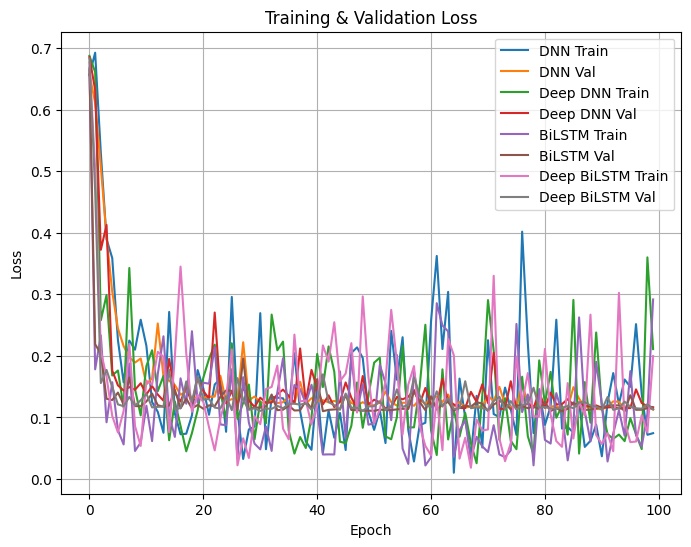

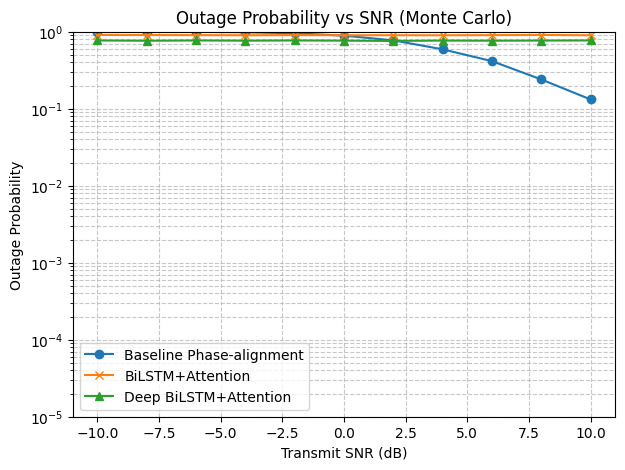

In [10]:
# ris_deep_dnn_bilstm_montecarlo_pipeline.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from google.colab import files

# ---------------------------
# Composite Fading Channel
# ---------------------------
def generate_composite_channel(num_samples, m_naka=2.0, inv_gamma_shape=3.0, inv_gamma_scale=1.0):
    Gccc = np.random.gamma(shape=m_naka, scale=1.0/m_naka, size=num_samples)
    Lccc = 1/np.random.gamma(shape=inv_gamma_shape, scale=1/inv_gamma_scale, size=num_samples)
    return Lccc * Gccc

# ---------------------------
# Dataset Generation
# ---------------------------
def generate_dnn_dataset(num_samples=5000, N_elements=64):
    Aerial_RIS = np.random.randint(8, N_elements, num_samples)
    phase_shift = np.random.uniform(0, 2*np.pi, num_samples)
    kappa = np.random.uniform(0.1, 1.0, num_samples)
    refraction = np.random.uniform(0.0, 0.5, num_samples)
    std_dev = np.random.uniform(0.01, 0.3, num_samples)
    hccc = generate_composite_channel(num_samples)
    snr_eff = (Aerial_RIS * kappa * np.cos(phase_shift) * (1-refraction) * hccc) / (std_dev + 1e-3)
    feat_eff_reflection = kappa * np.cos(phase_shift)
    feat_normalized_ris = Aerial_RIS / N_elements
    R_th = np.random.uniform(0.5, 2.0, num_samples)
    threshold_snr = 2**R_th - 1
    outage = (snr_eff < threshold_snr).astype(int)

    df = pd.DataFrame({
        "Aerial_RIS": Aerial_RIS,
        "Phase_shift": phase_shift,
        "Kappa": kappa,
        "Refraction": refraction,
        "Std_dev": std_dev,
        "Eff_reflection": feat_eff_reflection,
        "Normalized_RIS": feat_normalized_ris,
        "SNR_eff": snr_eff,
        "Threshold_SNR": threshold_snr,
        "Outage": outage
    })
    df.to_csv("ris_dataset_summary_dnn.csv", index=False)
    files.download("ris_dataset_summary_dnn.csv")
    return df

def generate_bilstm_dataset(num_sequences=2000, seq_len=30, N_elements=64):
    seq_list = []
    outage_list = []
    for _ in range(num_sequences):
        seq_Aerial = np.random.randint(8, N_elements, seq_len)
        seq_phase = np.random.uniform(0, 2*np.pi, seq_len)
        seq_kappa = np.random.uniform(0.1, 1.0, seq_len)
        seq_refraction = np.random.uniform(0.0, 0.5, seq_len)
        seq_std = np.random.uniform(0.01, 0.3, seq_len)
        hccc_seq = generate_composite_channel(seq_len)
        snr_eff_seq = (seq_Aerial * seq_kappa * np.cos(seq_phase) * (1 - seq_refraction) * hccc_seq) / (seq_std + 1e-3)
        threshold_snr_seq = 2**1.0 - 1
        outage_seq = (snr_eff_seq < threshold_snr_seq).astype(int)
        feat_eff_reflection = seq_kappa * np.cos(seq_phase)
        feat_normalized_ris = seq_Aerial / N_elements
        seq_features = np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std,
                                 feat_eff_reflection, feat_normalized_ris], axis=1)
        seq_list.append(seq_features)
        outage_list.append(outage_seq.mean())
    np.savez("ris_dataset_summary_bilstm.npz", X=np.array(seq_list), y=np.array(outage_list))
    files.download("ris_dataset_summary_bilstm.npz")
    return np.array(seq_list), np.array(outage_list)

# ---------------------------
# Models
# ---------------------------
class DNNModel(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, output_dim=2):
        super(DNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

class DeepDNNModel(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=256, output_dim=2):
        super(DeepDNNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, num_layers=3, output_dim=2):
        super(BiLSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attention_fc = nn.Linear(hidden_dim*2, 1)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    def forward(self, x):
        out,_ = self.lstm(x)
        attn_weights = torch.softmax(self.attention_fc(out), dim=1)
        context = torch.sum(out * attn_weights, dim=1)
        out = self.fc(context)
        return out

class DeepBiLSTMAttention(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=256, num_layers=5, output_dim=2, dropout=0.2):
        super(DeepBiLSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True,
                            bidirectional=True, dropout=dropout)
        self.attention_fc = nn.Linear(hidden_dim*2, 1)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    def forward(self, x):
        out,_ = self.lstm(x)
        attn_weights = torch.softmax(self.attention_fc(out), dim=1)
        context = torch.sum(out * attn_weights, dim=1)
        out = self.fc(context)
        return out

# ---------------------------
# Training utility
# ---------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=1e-3, batch_size=128, is_seq=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        idx = np.random.permutation(len(X_train))
        for i in range(0, len(X_train), batch_size):
            batch_idx = idx[i:i+batch_size]
            xb = torch.tensor(X_train[batch_idx], dtype=torch.float32)
            if is_seq:
                xb = xb.unsqueeze(1)
            yb = torch.tensor(y_train[batch_idx], dtype=torch.long)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            x_val = torch.tensor(X_val, dtype=torch.float32)
            if is_seq:
                x_val = x_val.unsqueeze(1)
            preds_val = model(x_val)
            val_loss = criterion(preds_val, torch.tensor(y_val, dtype=torch.long))
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        print(f"Epoch {epoch+1}/{epochs} Train: {loss.item():.4f} Val: {val_loss.item():.4f}")
    return train_losses, val_losses

# ---------------------------
# Monte Carlo Outage Probability
# ---------------------------
def monte_carlo_outage(model, snr_dB_range, num_mc=10000, seq_len=30, N_elements=64):
    outage_baseline = []
    outage_model = []

    for snr_db in snr_dB_range:
        snr_linear = 10**(snr_db/10)
        # Generate channel realizations
        hccc = generate_composite_channel(num_mc)
        threshold = 2**1.0 - 1

        # Baseline
        snr_eff_baseline = hccc * snr_linear
        outage_baseline.append(np.mean(snr_eff_baseline < threshold))

        # BiLSTM/Model
        seq_Aerial = np.random.randint(8, N_elements, (num_mc, seq_len))
        seq_phase = np.random.uniform(0, 2*np.pi, (num_mc, seq_len))
        seq_kappa = np.random.uniform(0.1, 1.0, (num_mc, seq_len))
        seq_refraction = np.random.uniform(0.0, 0.5, (num_mc, seq_len))
        seq_std = np.random.uniform(0.01, 0.3, (num_mc, seq_len))
        feat_eff_reflection = seq_kappa * np.cos(seq_phase)
        feat_normalized_ris = seq_Aerial / N_elements
        X_mc = np.stack([seq_Aerial, seq_phase, seq_kappa, seq_refraction, seq_std,
                         feat_eff_reflection, feat_normalized_ris], axis=2)
        X_mc_tensor = torch.tensor(X_mc, dtype=torch.float32)
        with torch.no_grad():
            pred_probs = torch.softmax(model(X_mc_tensor), dim=1).numpy()
        pred_outage = (pred_probs[:,1] > 0.5).astype(int)
        outage_model.append(np.mean(pred_outage))

    return np.array(outage_baseline), np.array(outage_model)

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Generate datasets
    dnn_df = generate_dnn_dataset()
    X_seq, y_seq = generate_bilstm_dataset()

    features = ["Aerial_RIS","Phase_shift","Kappa","Refraction","Std_dev","Eff_reflection","Normalized_RIS"]
    X = dnn_df[features].values
    y = dnn_df["Outage"].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # --- Train original DNN ---
    dnn_model = DNNModel()
    train_losses_dnn, val_losses_dnn = train_model(dnn_model, X_train, y_train, X_val, y_val, epochs=100)

    # --- Train deep DNN ---
    deep_dnn_model = DeepDNNModel()
    train_losses_deep_dnn, val_losses_deep_dnn = train_model(deep_dnn_model, X_train, y_train, X_val, y_val, epochs=100)

    # --- Train original BiLSTM+Attention ---
    bilstm_model = BiLSTMAttention()
    train_losses_bilstm, val_losses_bilstm = train_model(bilstm_model, X_train, y_train, X_val, y_val, epochs=100, is_seq=True)

    # --- Train deep BiLSTM+Attention ---
    deep_bilstm_model = DeepBiLSTMAttention()
    train_losses_deep_bilstm, val_losses_deep_bilstm = train_model(deep_bilstm_model, X_train, y_train, X_val, y_val, epochs=100, is_seq=True)

    # --- Plot Training & Validation Loss ---
    plt.figure(figsize=(8,6))
    plt.plot(train_losses_dnn, label="DNN Train")
    plt.plot(val_losses_dnn, label="DNN Val")
    plt.plot(train_losses_deep_dnn, label="Deep DNN Train")
    plt.plot(val_losses_deep_dnn, label="Deep DNN Val")
    plt.plot(train_losses_bilstm, label="BiLSTM Train")
    plt.plot(val_losses_bilstm, label="BiLSTM Val")
    plt.plot(train_losses_deep_bilstm, label="Deep BiLSTM Train")
    plt.plot(val_losses_deep_bilstm, label="Deep BiLSTM Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # --- Monte Carlo Outage Probability ---
    snr_range_dB = np.arange(-10, 11, 2)
    outage_baseline, outage_orig_bilstm = monte_carlo_outage(bilstm_model, snr_range_dB)
    _, outage_deep_bilstm = monte_carlo_outage(deep_bilstm_model, snr_range_dB)

    plt.figure(figsize=(7,5))
    plt.semilogy(snr_range_dB, outage_baseline, marker='o', label="Baseline Phase-alignment")
    plt.semilogy(snr_range_dB, outage_orig_bilstm, marker='x', label="BiLSTM+Attention")
    plt.semilogy(snr_range_dB, outage_deep_bilstm, marker='^', label="Deep BiLSTM+Attention")
    plt.xlabel("Transmit SNR (dB)")
    plt.ylabel("Outage Probability")
    plt.title("Outage Probability vs SNR (Monte Carlo)")
    plt.ylim([1e-5,1])
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

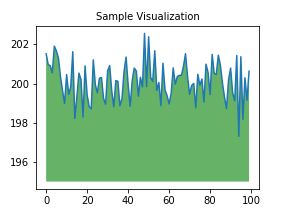

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
